# Trabalho Final
Neste trabalho, vamos buscar o reconhecimento dos dígitos da Linguagem de Sinais. Para tal, vamos nos utilizar de Modelos conhecidos de Deep Learning e também nos aventurar na criação de próprios.

------

## Imports

In [21]:
import os
import numpy as np
from random import sample, seed
seed(42)
np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

# Keras imports
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D, Dense, Flatten
from keras.models import Model, Sequential
from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

import inf619utils

# Dataset
O dataset é composto por 10 classes (dígitos de 0 a 9) com aproximadamente 205 imagens por classe. 
O conjunto foi dividido em 60% para treinamento, 15% para validação e 20% para teste.
As imagens estão divididas em blocos por classe.

** IMPORTANTE NÃO ALTERAR O NOME/LOCAL DAS IMAGENS** 

In [2]:
datasetDir = "./Dataset"
datasetDirSplitted = "./DatasetSplitted"
nbClasses = 10
input_shape = (224,224,3)
input_size = (224,224)

train_files = {}
val_files = {}
test_files = {}

train_files, val_files, test_files = inf619utils.splitData(datasetDir, nbClasses)

In [ ]:
#plot the images from imgList
def plotImagesFromBatch(imgList):
    for i in range(len(imgList)):
        plotImage(imgList[i])

## Definição do modelo 

In [ ]:
model = ResNet50(input_shape=input_shape, include_top=False, pooling='max')

In [ ]:
model.summary()

# carregamento dos dados de treino, validação e test

In [6]:
batch_size = 1
epochs = 30

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './DatasetSplitted/train',
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

validation_generator = val_datagen.flow_from_directory(
        './DatasetSplitted/val',
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 1242 images belonging to 10 classes.
Found 309 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        datasetDirSplitted + '\\test',
        target_size=input_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

Found 511 images belonging to 10 classes.


# Aplicação do Modelo no Conjunto de Testes

In [ ]:
bottleneck_features_train = model.predict_generator(train_generator, steps=int(1242/batch_size))

In [ ]:
print(len(train_generator.classes), bottleneck_features_train.shape)

In [ ]:
np.save(open('bottleneck_features_train.npy', 'wb'), bottleneck_features_train)
np.save(open('bottleneck_features_train_y.npy', 'wb'), train_generator.classes)

In [ ]:
bottleneck_features_val = model.predict_generator(validation_generator, steps=int(309/batch_size))

In [ ]:
np.save(open('bottleneck_features_validation.npy', 'wb'), bottleneck_features_val)
np.save(open('bottleneck_features_validation_y.npy', 'wb'), validation_generator.classes)

In [ ]:
bottleneck_features_test = model.predict_generator(test_generator, steps=int(511/batch_size))

In [ ]:
np.save(open('bottleneck_features_test.npy', 'wb'), bottleneck_features_test)
np.save(open('bottleneck_features_test_y.npy', 'wb'), test_generator.classes)

In [ ]:
del bottleneck_features_train, bottleneck_features_val, bottleneck_features_test

# Carregar variaves da ResNet

In [3]:
train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.load(open('bottleneck_features_train_y.npy','rb'))

In [4]:
train_labels

array([0, 0, 0, ..., 9, 9, 9])

In [9]:
 train_generator.classes

array([0, 0, 0, ..., 9, 9, 9])

In [10]:
val_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
val_labels = np.load(open('bottleneck_features_validation_y.npy', 'rb'))

In [11]:
test_data = np.load(open('bottleneck_features_test.npy', 'rb'))
test_labels = np.load(open('bottleneck_features_test_y.npy', 'rb'))

In [12]:
X_train = train_data
X_val = val_data
X_test = test_data

print(X_train.shape, X_val.shape, X_test.shape)

(1242, 2048) (309, 2048) (511, 2048)


# Treinar o modelo (Random Forest)

In [13]:
print(train_data.shape[0], train_data.shape[3])

IndexError: tuple index out of range

# Treinar o modelo (SVM)

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelBinarizer

In [19]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from inf619utils import plot_confusion

def search(X_train, X_test, y_train, y_test, group_data_train = None):
    
    # normalize data
    print("Normalizing data!")
    stdScale = StandardScaler().fit(X_train)
    xTrain = stdScale.transform(X_train)
    xTest = stdScale.transform(X_test)
    
    print("Grid Search Classifiers!")
    
    ln = LogisticRegression()
    knc = KNeighborsClassifier()
    svc = SVC()
    rfc = RandomForestClassifier()
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
    clf1 = SVC()
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    vt = VotingClassifier(estimators=[('svc', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

    lnp = [{'C': [0.01, 0.1, 1.0, 1, 10, 50, 100, 500, 1000],
           'solver' : ['lbfgs', 'liblinear'],
           }]
    
    kncp = [{'n_neighbors': [3, 5, 7, 10],
             'weights': ['uniform','distance'],
              'algorithm': ['auto','kd_tree', 'brute']}]
    svcp = [{'kernel': ['rbf'], #{'kernel': ['rbf','linear'], 
             'class_weight':['balanced'],
             'gamma': [0.01, 0.001, 0.0001], #'gamma': [0.0001],#
             'decision_function_shape':['ovo'],
             'C': [0.01, 0.1, 1.0, 1, 10, 50, 100, 500, 1000]}]#'C': [1000]}]#
    rfcp = [{'n_estimators': [10, 20, 50, 100,200], 
            'max_features': ['auto', 'log2'],
            'max_depth': [None],
            'bootstrap': [True, False],
            'criterion': ["gini", "entropy"]}]
    gbp = [{#'loss' : ['deviance', 'exponential'],
           'n_estimators': [10, 50,100],
           'learning_rate': [0.001, 0.01, 0.1, 1.0]
           #'max_features': ['auto', 'log2'],
           #'max_depth' : [3,5,10, 100]
            }]
           #'min_impurity_decrease': [0.0]}]#, 0.1]}]
    vtp = [{'svc__C': [1.0, 100.0], 
            'rf__n_estimators': [20, 200],}]
   
    classifiers = [('Logistic', ln, lnp),
                    ('kNN', knc, kncp),                                 
                    ('Support Vector', svc, svcp),
                    ('Random Forest', rfc, rfcp),
                    ('Gradient Boosting', gb, gbp),
                    ('Vooting', vt, vtp)
    ]
    
    for name, classifier, params in classifiers:
        print(name)
        clf = GridSearchCV(classifier, params,n_jobs=4, cv=2, scoring=['f1_weighted','accuracy','precision_weighted', 'recall_weighted'], refit='f1_weighted' , verbose = 10)

        clf.fit(X_train, y_train)#, groups=group_data_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print(clf.best_score_)
        print()
        print(clf.cv_results_.keys())
        means = clf.cv_results_['mean_test_accuracy']
        stds = clf.cv_results_['std_test_accuracy']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        yTrue, yPred = y_test, clf.predict(X_test)
        print(yPred[1:30])
        print(yTrue[1:30])
        print(classification_report(yTrue, yPred))
        plot_confusion(yTrue, yPred, name)
        print()

Normalizing data!
Grid Search Classifiers!
Logistic
Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   29.1s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   53.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  33 out of  36 | elapsed:  2.0min remaining:   10.8s
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed:  2.2min finished
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this

Best parameters set found on development set:

{'C': 50, 'solver': 'liblinear'}

Grid scores on development set:
0.28649905301306017

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_solver', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision_weighted', 'split1_test_precision_weighted', 'mean_test_precision_weighted', 'std_test_precision_weighted', 'rank_test_precision_weighted', 'split0_train_precision_weighted', 'split1_train_precision_weighted', 'mean_train_precision_weighted', 'std_train_precision_weighted', 'split0

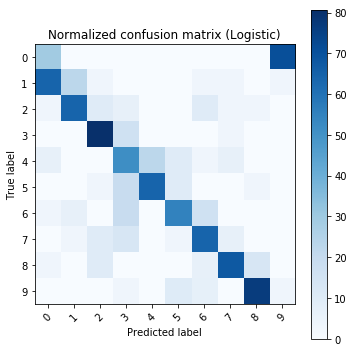


kNN
Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed: 612.7min
[Parallel(n_jobs=4)]: Done  46 out of  48 | elapsed: 612.8min remaining: 26.6min
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed: 612.8min finished
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

Grid scores on development set:
0.2496746127892983

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_algorithm', 'param_n_neighbors', 'param_weights', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision_weighted', 'split1_test_precision_weighted', 'mean_test_precision_weighted', 'std_test_precision_weighted', 'rank_test_precision_weighted', 'split0_train_precision_weighted', 'split1_train_precision_weighted', 'mean_train_

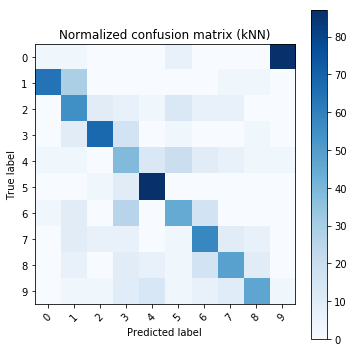


Support Vector
Fitting 2 folds for each of 27 candidates, totalling 54 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   55.7s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.7min
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed:  5.8min finished
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'C': 500, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:
0.29177311376977827

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_class_weight', 'param_decision_function_shape', 'param_gamma', 'param_kernel', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision_weighted', 'split1_test_precision_weighted', 'mean_test_precision_weighted', 'std_test_precision_weighted', 'rank_test_precision_weighted'

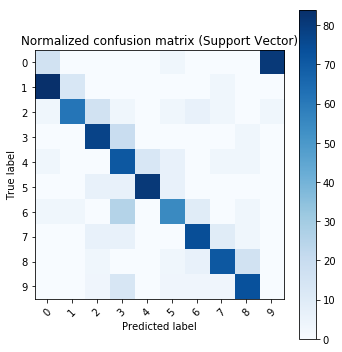


Random Forest
Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    5.3s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    9.9s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   13.3s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   26.1s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   45.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   56.5s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  1.6min finished
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}

Grid scores on development set:
0.2514037866710197

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bootstrap', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision_weighted', 'split1_test_precision_weighted', 'mean_test_precision_weighted', 'std_test_precision_weighted', 'rank_test_precision_weighted'

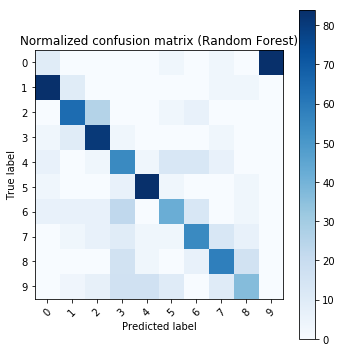


Gradient Boosting
Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:   53.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done  20 out of  24 | elapsed:  3.6min remaining:   43.2s
[Parallel(n_jobs=4)]: Done  24 out of  24 | elapsed:  4.4min finished
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'learning_rate': 0.1, 'n_estimators': 100}

Grid scores on development set:
0.24455196957822087

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_n_estimators', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision_weighted', 'split1_test_precision_weighted', 'mean_test_precision_weighted', 'std_test_precision_weighted', 'rank_test_precision_weighted', 'split0_train_precision_weighted', 'split1_train_precision_weighted', 'mean_train_precision_weighted', 'std_train

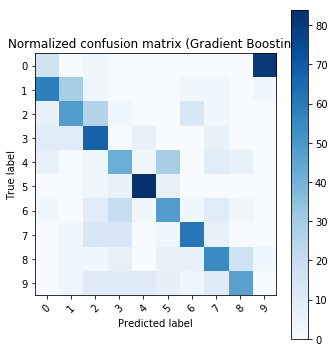


Vooting
Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   8 | elapsed:   24.1s remaining:  1.2min
[Parallel(n_jobs=4)]: Done   3 out of   8 | elapsed:   25.2s remaining:   42.1s
[Parallel(n_jobs=4)]: Done   4 out of   8 | elapsed:   25.5s remaining:   25.5s
[Parallel(n_jobs=4)]: Done   5 out of   8 | elapsed:   51.0s remaining:   30.6s
[Parallel(n_jobs=4)]: Done   6 out of   8 | elapsed:   51.6s remaining:   17.1s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:   54.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   8 out of   8 | elapsed:   54.0s finished
c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best parameters set found on development set:

{'rf__n_estimators': 200, 'svc__C': 100.0}

Grid scores on development set:
0.2404100917040017

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_rf__n_estimators', 'param_svc__C', 'params', 'split0_test_f1_weighted', 'split1_test_f1_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted', 'split0_train_f1_weighted', 'split1_train_f1_weighted', 'mean_train_f1_weighted', 'std_train_f1_weighted', 'split0_test_accuracy', 'split1_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_train_accuracy', 'split1_train_accuracy', 'mean_train_accuracy', 'std_train_accuracy', 'split0_test_precision_weighted', 'split1_test_precision_weighted', 'mean_test_precision_weighted', 'std_test_precision_weighted', 'rank_test_precision_weighted', 'split0_train_precision_weighted', 'split1_train_precision_weighted', 'mean_train_precision_weighted', 'std_train_prec

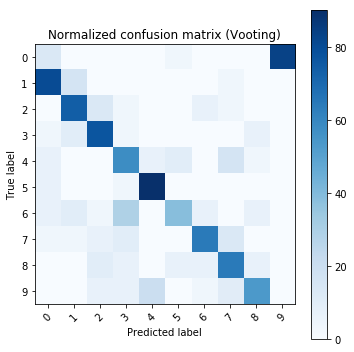

In [20]:
search(X_train, X_val, train_labels, val_labels)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(test_labels, y_pred)
print(report) 

# Gerar matrix de confusão

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, y_pred)

In [44]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, perplexity=10).fit_transform(X_train)

In [45]:
X_embedded[:,0].shape

(1242,)

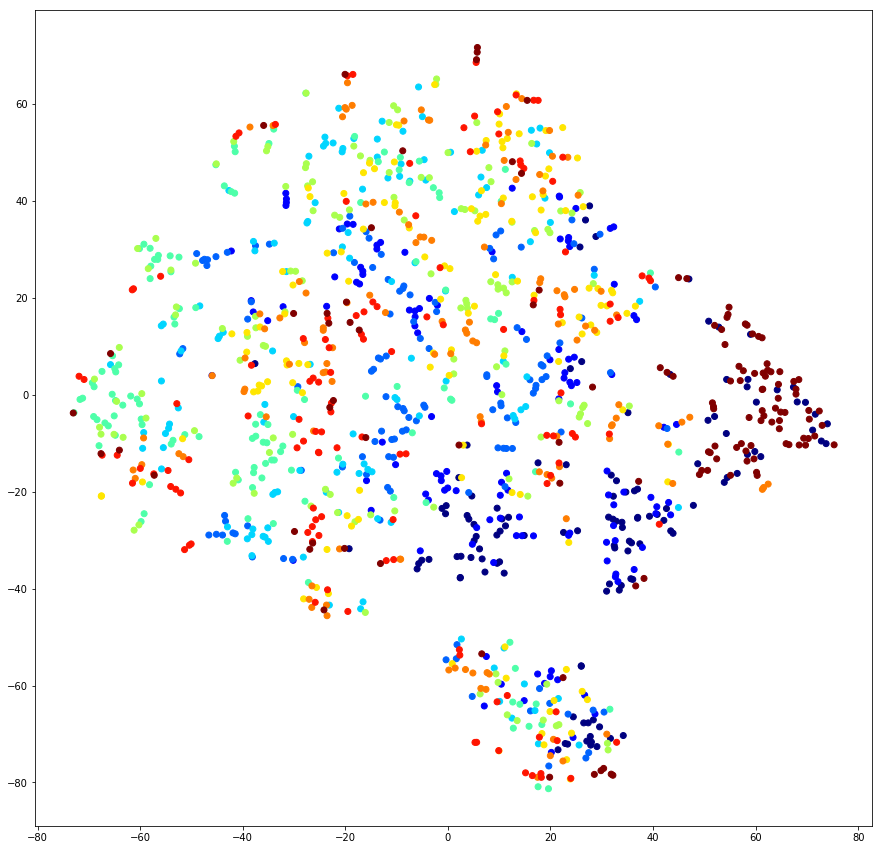

In [46]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=train_labels , cmap=plt.cm.get_cmap("jet", 10))
plt.show()